# Analytical Detective

In [24]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
# load data
mvt = pd.read_csv('./data/mvtWeek1.csv', low_memory=False)

In [14]:
print('Number of rows: %i' % len(mvt))
print('Number of columns: %i' %  len(mvt.columns))
print('Max ID: %i' %  max(mvt.ID))
print('Min Beat %i' %  min(mvt.Beat))
print('Number of Arrests: %i' % mvt[mvt.Arrest == True].Arrest.count())
print('Number of Location in Alleys: %i' % mvt[mvt.LocationDescription == 'ALLEY'].LocationDescription.count())

Number of rows: 191641
Number of columns: 11
Max ID: 9181151
Min Beat 111
Number of Arrests: 15536
Number of Location in Alleys: 2308


In [15]:
date_convert = pd.to_datetime(mvt.Date, format="%m/%d/%y %H:%M")
print('Attaching Month to DataFrame')
mvt['Month'] = date_convert.map(lambda x: x.month)

Attaching Month to DataFrame


In [16]:
print('Attaching Weekday to DataFrame')
mvt['Weekday'] = date_convert.map(lambda x: x.weekday())

Attaching Weekday to DataFrame


In [17]:
print('Min Month with thefts')
print(mvt.groupby(['Month']).size())

Min Month with thefts
Month
1     16047
2     13511
3     15758
4     15280
5     16035
6     16002
7     16801
8     16572
9     16060
10    17086
11    16063
12    16426
dtype: int64


In [18]:
print('Min Weekday with thefts')
print(mvt.groupby(['Weekday']).size())

Min Weekday with thefts
Weekday
0    27397
1    26791
2    27416
3    27319
4    29284
5    27118
6    26316
dtype: int64


In [19]:
mvt['Date'] = date_convert

In [20]:
print('Get the month with maximum thefts with arrests')
arrests = mvt[mvt.Arrest == True]
m = arrests.groupby('Month')
print(m.Month.size())

Get the month with maximum thefts with arrests
Month
1     1435
2     1238
3     1298
4     1252
5     1187
6     1230
7     1324
8     1329
9     1248
10    1342
11    1256
12    1397
dtype: int64


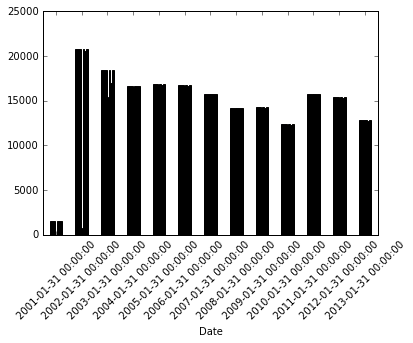

In [26]:
mvt.set_index(['Date'], drop=False, inplace=True)
# mvt.plot.hist(bins=100)
mvt.groupby(pd.TimeGrouper(freq='12M')).count().plot(kind='bar', legend=False, rot=45)

In [36]:
print(mvt.groupby(['Arrest', 'Year']).size())
arrest_2001 = 2152
no_arrest_2001 = 18517
TOTAL = arrest_2001 + no_arrest_2001
print(2152 / TOTAL)

Arrest  Year
False   2001    18517
        2002    16638
        2003    14859
        2004    15169
        2005    14956
        2006    14796
        2007    13068
        2008    13425
        2009    11327
        2010    14796
        2011    15012
        2012    13542
True    2001     2152
        2002     2115
        2003     1798
        2004     1693
        2005     1528
        2006     1302
        2007     1212
        2008     1020
        2009      840
        2010      701
        2011      625
        2012      550
dtype: int64
0.10411727708161982


In [37]:
arrest_2007 = 1212
no_arrest_2007 = 13068
TOTAL = arrest_2007 + no_arrest_2007
print(arrest_2007 / TOTAL)

0.08487394957983194


In [38]:
arrest_2012 = 550
no_arrest_2012 = 13542
TOTAL = arrest_2012 + no_arrest_2012
print(arrest_2012 / TOTAL)

0.03902923644621062


In [47]:
print(mvt.groupby('LocationDescription').size().sort_values(ascending=False))

LocationDescription
STREET                                             156564
PARKING LOT/GARAGE(NON.RESID.)                      14852
OTHER                                                4573
ALLEY                                                2308
GAS STATION                                          2111
DRIVEWAY - RESIDENTIAL                               1675
RESIDENTIAL YARD (FRONT/BACK)                        1536
RESIDENCE                                            1302
RESIDENCE-GARAGE                                     1176
VACANT LOT/LAND                                       985
VEHICLE NON-COMMERCIAL                                817
SIDEWALK                                              462
CHA PARKING LOT/GROUNDS                               405
AIRPORT/AIRCRAFT                                      363
POLICE FACILITY/VEH PARKING LOT                       266
PARK PROPERTY                                         255
SCHOOL, PUBLIC, GROUNDS                             

In [57]:
top5 = mvt.loc[(mvt.LocationDescription == 'STREET') | (mvt.LocationDescription == 'PARKING LOT/GARAGE(NON.RESID.)') \
               | (mvt.LocationDescription == 'ALLEY') | (mvt.LocationDescription == 'GAS STATION') \
               | (mvt.LocationDescription == 'DRIVEWAY - RESIDENTIAL')]

In [59]:
len(top5)

177510

In [60]:
print(top5.groupby('LocationDescription').size().sort_values(ascending=False))

LocationDescription
STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
ALLEY                               2308
GAS STATION                         2111
DRIVEWAY - RESIDENTIAL              1675
dtype: int64


In [76]:
print(top5.groupby(['LocationDescription', 'Arrest']).size())
print()

LocationDescription             Arrest
ALLEY                           False       2059
                                True         249
DRIVEWAY - RESIDENTIAL          False       1543
                                True         132
GAS STATION                     False       1672
                                True         439
PARKING LOT/GARAGE(NON.RESID.)  False      13249
                                True        1603
STREET                          False     144969
                                True       11595
dtype: int64



In [78]:
print("GAS STATION")
print(439/(439 + 1672))

GAS STATION
0.2079583135954524


In [80]:
gas_station = top5.loc[(top5.LocationDescription == 'GAS STATION')]
print(gas_station.groupby(['Weekday']).size())

Weekday
0    280
1    270
2    273
3    282
4    332
5    338
6    336
dtype: int64


In [82]:
res = top5.loc[(top5.LocationDescription == 'DRIVEWAY - RESIDENTIAL')]
print(res.groupby(['Weekday']).size().sort_values())

Weekday
5    202
6    221
2    234
1    243
0    255
4    257
3    263
dtype: int64
